## California Housing Prices Dataset
### Data Exploration and Evaluation of different machine learning models

This exercise is based on Chapter 2 "End to End Machine Learning Project" of the Book "Hands-on Machine Learning with Scikit-learn and Tensorflow" by Aurelien Geron.

The goal of this exercise is to do exploratory data analysis on the dataset of **California Housing Prices** (freely available on [https://www.kaggle.com/camnugent/california-housing-prices](https://www.kaggle.com/camnugent/california-housing-prices)) and try to find the best model to predict the housing price that gives the lowest error of these.

This problem is being treated as **Regression** problem, thus the models that are being evaluated are regression models.

---

In [1]:
#Import packages
import pandas as pd

## Data

The dataset consists of the following features
- 'Latitude': The latitude of the housing district
- 'Longitude': The longitude of the housing district
- 'Housing Median Age': The median age of the houses in the district
- 'Total Rooms': Total number of rooms in all the houses in the district
- 'Total Bedrooms': Total number of bedrooms in all the houses in the district
- 'Population': The population of the district
- 'Households': The total number of households in the district
- 'Median Income': The median income in the district
- 'Median House Value': The median value of the houses in the district
- 'Ocean proximity': Where is the district located in relation to the ocean

### Inspecting the first few rows of the dataset

In [2]:
#Load the data
housing = pd.read_csv('housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Inspecting the properties of the data

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


As seen from the above summary, all the attributes consist of 20640 values that are not null of the type float, apart from the attribute "total_bedroom" that contains some values that are null. Furthermore, all the attributes except ocean proximity are numerical.

Taking a quick look at "ocean_proximity" to see what kind of values it contains.

In [4]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Creating a Histogram of all the attributes
Inspecting the distribution of the different attributes

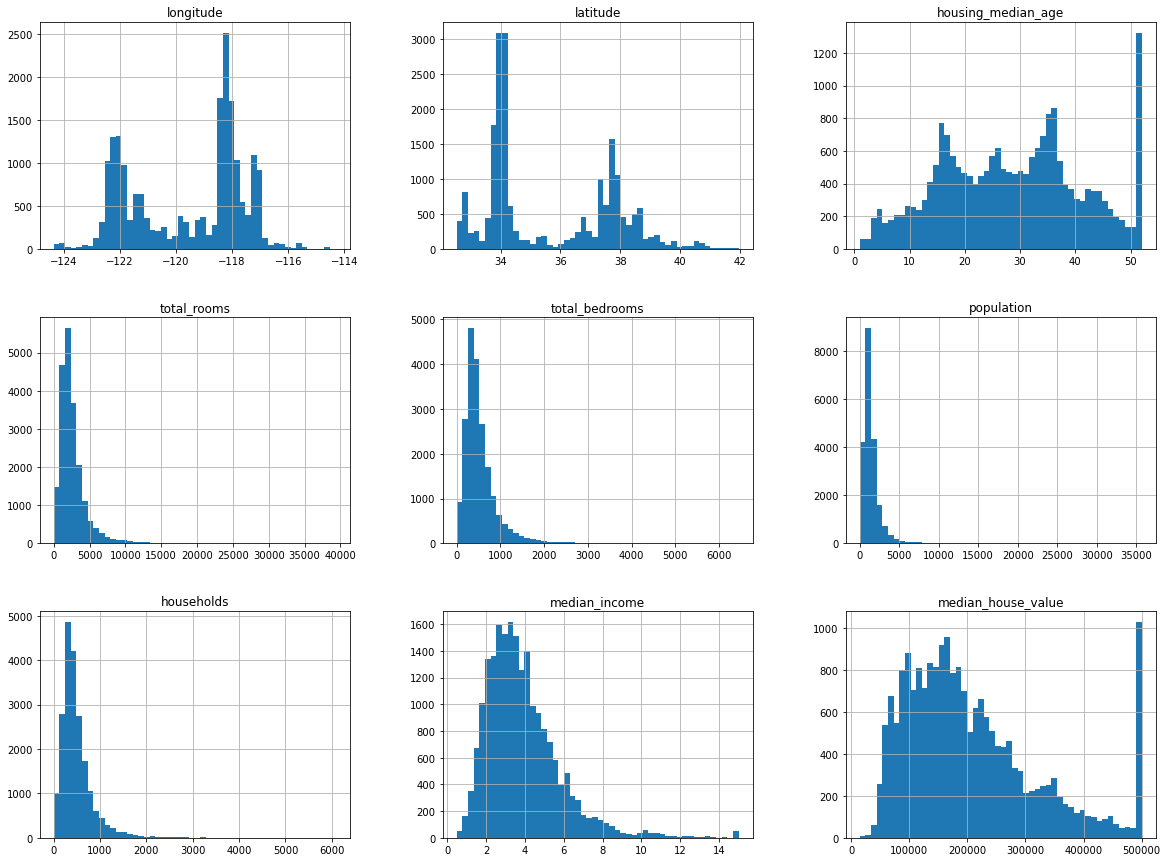

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

### Some important observations
1. The median income is not presented in USD. It has been scaled and has an upper bound of 15 for higher incomes and a lower bound of 0.5 for lower incomes
2. The housing median age is capped at 50
3. The median house value is capped at USD 500.000. Since this is the target variable, we have to consider if predictions beyod USD 500.000 are required.
4. All the attributes have different scaled. Scaling the data will be required
5. Many of the histograms are *tail heavy*. The attributes will have to be transformed so they have a gaussian distribution

### Removing outliers from the data
Removing outliers from the data by filtering out the values that have z-scores >3

In [11]:
import numpy as np
housing_num = housing.drop(["ocean_proximity","latitude","longitude"],axis=1)
#Finding the z-scores
housing_num_z_scores = np.abs((housing_num - housing_num.mean())/housing_num.std(ddof=0))

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

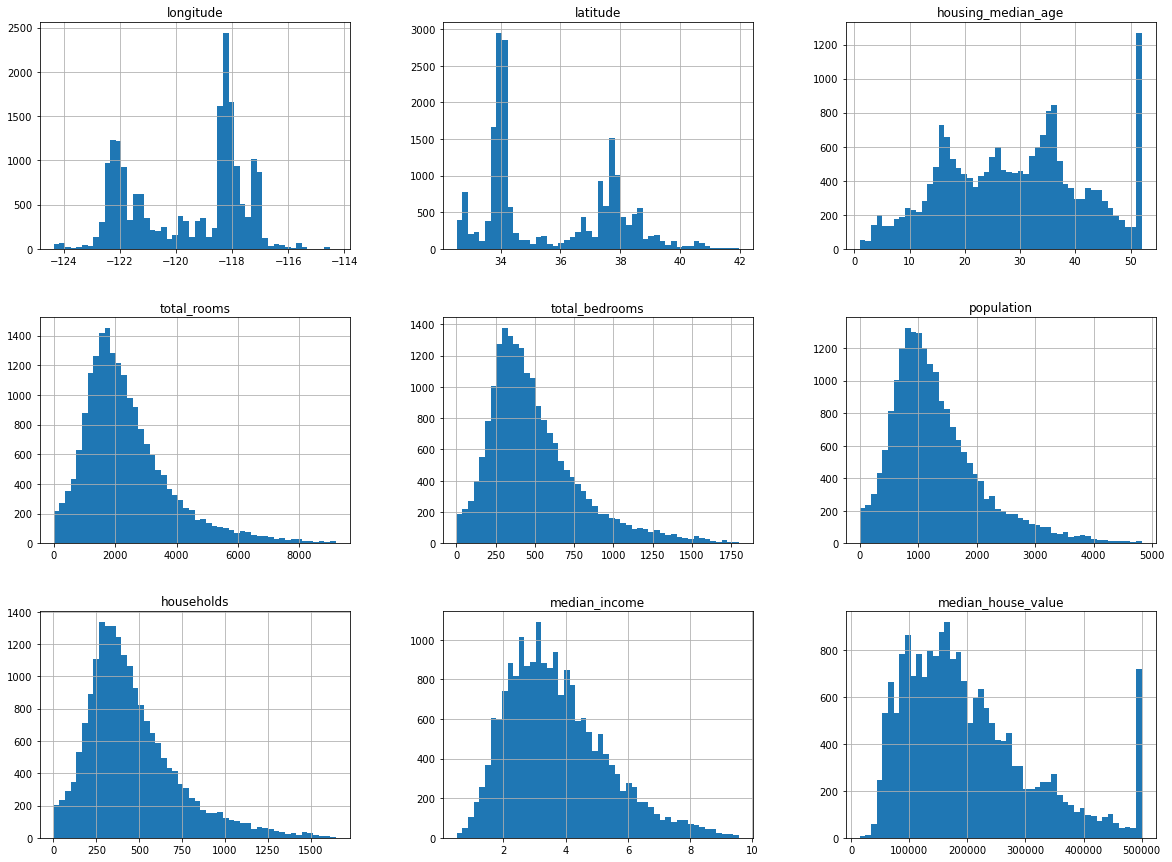

In [12]:
#Removing all the rows where the z score is greater than 3 in at least one column
# i.e. only keep the rows where z-score is less than 3 in all columns
housing_filtered = housing[(housing_num_z_scores < 3).all(axis=1)]
#reset index
housing_filtered.reset_index(inplace=True)
housing_filtered.drop('index',axis=1, inplace=True)
housing_filtered.hist(bins=50, figsize=(20,15))

### Creating a test set and setting it aside
The test set should be kept separate from the training set, so only the final model can be applied to the test set.

In [13]:
import numpy as np
#Define a function to split the data into test and training sets
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [14]:
#Setting housing = filtered data
housing = housing_filtered.copy()

In [15]:
train_set, test_set = split_train_test(housing, 0.2)

In [16]:
len(train_set)

15640

In [17]:
len(test_set)

3909

In [18]:
#Using each instances hash to decide whether it should or should not go into the test set
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [19]:
#Unfortunatley, the housing dataset does not have an id column
#Instead we can use the row index as the ID
housing_with_id = housing.reset_index() #adds an index column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [20]:
len(train_set)

15641

In [21]:
len(test_set)

3908

In [22]:
#Using latitude and logitude as id column
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [23]:
#Now using sklearn's train_test_split function
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size = 0.2, random_state=42)

<AxesSubplot:>

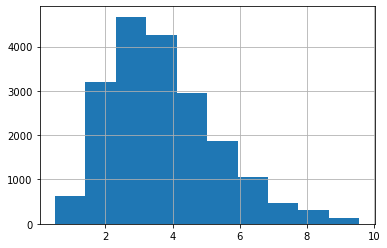

In [24]:
#Using the median income as criteria to represent the different income groups
#First we need to convert the median income from continuous numerical to categorical attribute
housing["median_income"].hist()

<AxesSubplot:>

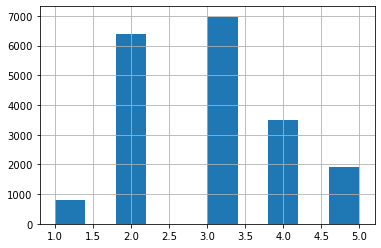

In [25]:
#Converting the income to a categorical attribute with 5 categories

housing["income_cat"] = pd.cut(housing["median_income"],
                              bins = [0., 1.5, 3.0, 4.5, 6., np.inf],
                              labels =[1, 2, 3, 4, 5])
housing["income_cat"].hist()

In [26]:
#Now we can do stratified sampling based on the income category
#Using scikit-learn's StratifiedShuffleSplit class

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [27]:
#Checking if the split worked as intended
#Looking at the proportions per income category in the test set
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.356522
2    0.326343
4    0.178005
5    0.097698
1    0.041432
Name: income_cat, dtype: float64

In [28]:
#Now looking at the proportions for the complete dataset
housing["income_cat"].value_counts() / len(housing)

3    0.356591
2    0.326257
4    0.177963
5    0.097703
1    0.041485
Name: income_cat, dtype: float64

In [29]:
#Drop the income_cat attribute
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [30]:
#Exploratory Data Analysis
housing = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

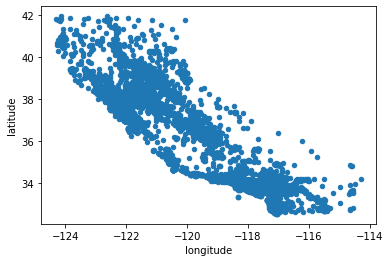

In [31]:
#Plotting the latitudes and logitudes as a scatter plot to visualize the data
housing.plot(kind="scatter", x="longitude", y="latitude")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

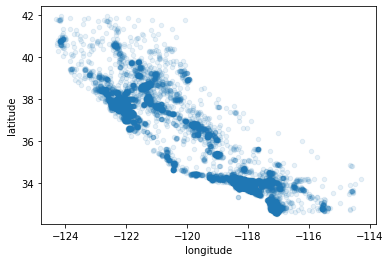

In [32]:
#Setting alpha=0.1 to visualize which are the high density areas
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

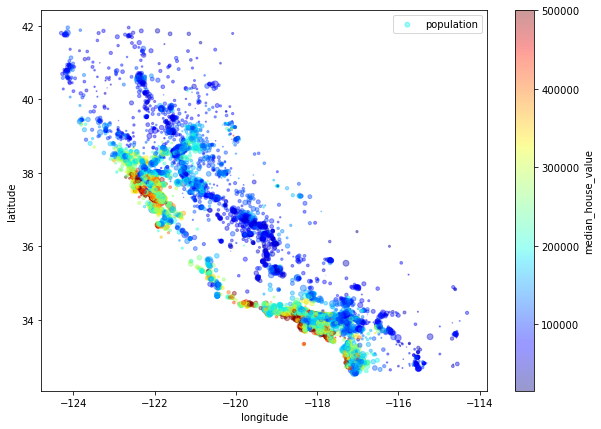

In [33]:
#Plotting the housing prices 
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing["population"]/100, label="population", figsize=(10,7),
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
            sharex=False)
plt.legend()

In [34]:
#Looking at the correlations
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.653723
total_rooms           0.164373
housing_median_age    0.121211
households            0.089570
total_bedrooms        0.069785
population           -0.038161
longitude            -0.047138
latitude             -0.145098
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

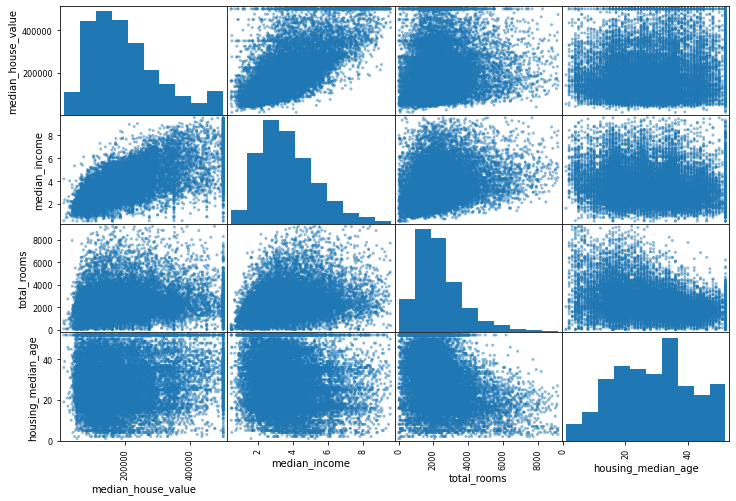

In [35]:
#Using scatter matrix to check for correlation
from pandas.plotting import scatter_matrix
#Selecting only the attributes that seem promising
attributes = ["median_house_value", "median_income", "total_rooms",
             "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

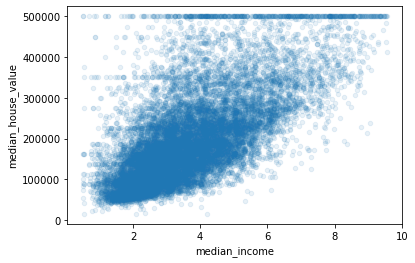

In [36]:
#Plotting the median income again to get a bigger picture
housing.plot(kind="scatter", x="median_income", y="median_house_value",
            alpha=0.1)

In [37]:
#Experimenting with attribute combinations
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [38]:
#Looking at the correlation matrix again:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.653723
total_rooms                 0.164373
housing_median_age          0.121211
rooms_per_household         0.115710
households                  0.089570
total_bedrooms              0.069785
population                 -0.038161
longitude                  -0.047138
population_per_household   -0.053119
latitude                   -0.145098
bedrooms_per_room          -0.212755
Name: median_house_value, dtype: float64

In [39]:
#Prepare data for machine learning algorithms
#Starting from clean dataset again
#Separating the predictors and the labels
housing = strat_train_set.drop("median_house_value",axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [40]:
#Data cleaning
#Using simple Imputer to fill in all the missing values with the median
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
#The median can be computed only on numerical attributes
#Therefore, the categorical attribute has to be dropped
housing_num = housing.drop("ocean_proximity", axis=1)
#Fit the imputer on the numerical attributes
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [41]:
#Checking the statistics attribute
imputer.statistics_

array([-118.51  ,   34.27  ,   29.    , 2081.    ,  428.    , 1149.    ,
        403.    ,    3.4861])

In [42]:
#Now the trained imputer can be used to transform the training set by replacing the missing values 
#by the median
X = imputer.transform(housing_num)
#Putting the data back into a dataframe
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [43]:
#Handling the text and categorical attributes
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
9395,<1H OCEAN
18398,INLAND
3088,INLAND
6295,INLAND
6602,<1H OCEAN
12199,INLAND
5009,<1H OCEAN
10607,<1H OCEAN
12489,INLAND
16018,NEAR OCEAN


In [44]:
#Converting the categories from text to numbers
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [4.]])

In [45]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [46]:
#Using One Hot Encoding
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<15639x5 sparse matrix of type '<class 'numpy.float64'>'
	with 15639 stored elements in Compressed Sparse Row format>

In [47]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [48]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [49]:
#Custom Transformers
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): #no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                        bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
    
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [50]:
#Transformation Pipeline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('atrribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [51]:
#Combining the pipeline for both numerical and categorical attributes
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])
housing_prepared = full_pipeline.fit_transform(housing)

In [52]:
housing_prepared

array([[-1.10542746,  0.49864497, -1.20679152, ...,  0.        ,
         0.        ,  0.        ],
       [-0.72610053,  0.94181895, -1.04583109, ...,  0.        ,
         0.        ,  0.        ],
       [-0.03732268,  0.32604037, -1.12631131, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.31028617, -1.33469583, -0.96535088, ...,  0.        ,
         0.        ,  0.        ],
       [-1.08546289,  1.40365289, -0.96535088, ...,  0.        ,
         0.        ,  0.        ],
       [-1.22521492,  1.04444872,  0.32233255, ...,  0.        ,
         1.        ,  0.        ]])

In [53]:
#Selecting and training amodel
#Training a linear regression model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [54]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

In [55]:
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [281941.5984562  219702.94713364 122995.58674348 177941.4215079
 165571.2911812 ]


In [56]:
print("Labels", list(some_labels))

Labels [190000.0, 162500.0, 91900.0, 234600.0, 190300.0]


In [57]:
#Measuring the RMSe
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

65905.80606525968

In [58]:
#Training a decision tree regressor
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [59]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [60]:
#Using sklearn K-fold cross validation to evaluate the model
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring="neg_mean_squared_error",cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [61]:
scores

array([-5.24277025e+09, -5.31372641e+09, -5.27751412e+09, -4.90974574e+09,
       -5.39563848e+09, -4.92893146e+09, -5.26525282e+09, -4.77776115e+09,
       -5.00073748e+09, -5.47304207e+09])

In [62]:
def display_scores(scores):
    print("Scores", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [63]:
display_scores(tree_rmse_scores)

Scores [72406.97655791 72895.31129903 72646.50106374 70069.57783166
 73455.00991509 70206.34912135 72562.06182227 69121.3508966
 70715.89268278 73980.01131469]
Mean: 71805.9042505127
Standard deviation: 1556.9560656335948


In [64]:
#Computing the scores for the linear regression model
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                            scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores [84729.39578585 68104.01038174 64288.64026651 64758.86808665
 69706.71588724 66574.31047154 64497.94328198 64034.07591501
 65833.18539703 66424.86704819]
Mean: 67895.2012521725
Standard deviation: 5866.577836265727


In [65]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18878.22080422294

In [67]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                               scoring="neg_mean_squared_error",cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores [49756.76831568 52264.57823833 50652.01102871 47645.57966172
 55085.69833154 51138.60250455 49368.48979638 48439.38893731
 49259.41580022 51549.57676442]
Mean: 50516.01093788665
Standard deviation: 2035.6307424319298


In [68]:
#Using Grid Search to fine tune the model
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators':[3,10,30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators':[3, 10], 'max_features': [2,3,4]}
]
forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [69]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [70]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [71]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64423.88505983357 {'max_features': 2, 'n_estimators': 3}
56135.35258549097 {'max_features': 2, 'n_estimators': 10}
53312.84977150926 {'max_features': 2, 'n_estimators': 30}
60665.05131050133 {'max_features': 4, 'n_estimators': 3}
53544.40733671768 {'max_features': 4, 'n_estimators': 10}
50865.05018402199 {'max_features': 4, 'n_estimators': 30}
59983.37376438981 {'max_features': 6, 'n_estimators': 3}
52509.15440337018 {'max_features': 6, 'n_estimators': 10}
50824.63756636249 {'max_features': 6, 'n_estimators': 30}
58902.18466924385 {'max_features': 8, 'n_estimators': 3}
52682.0178983759 {'max_features': 8, 'n_estimators': 10}
50361.190445551634 {'max_features': 8, 'n_estimators': 30}
62131.619720022136 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
55085.93631444578 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60537.84321177439 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52549.38803068946 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [72]:
#Analyzing the best models and their errors
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.06366988e-02, 6.85817676e-02, 4.91183369e-02, 1.65664675e-02,
       1.61619921e-02, 1.63255240e-02, 1.54671931e-02, 3.29178520e-01,
       3.97061915e-02, 1.26972937e-01, 6.92387467e-02, 1.00041665e-02,
       1.65389191e-01, 2.28886353e-04, 1.83623212e-03, 4.58714951e-03])

In [73]:
#Evaluate the system on the test set
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

49070.50914206319

In [74]:
#Calculating the confidence interval
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1,
                        loc=squared_errors.mean(),
                        scale=stats.sem(squared_errors)))

array([46813.36784266, 51228.29614725])

In [75]:
print("test comment")

test comment
